## California Housing Price Prediction
Construct machine learning models to predict the price of houses in California.

The “housing” dataset contains 20640 observations and 10 variables (9 predictors and 1 response). Below is a list of the variables with descriptions.
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea
- median_house_value: Median house value for households within a block (measured in US Dollars) 

Perform the following tasks to build a linear regression and a decision tree model to predict the housing prices.
    

In [ ]:
# 스파크 실행 시 문제 발생하면 이거 설정
import os
import sys
os.environ['JAVA_HOME'] = "C:\Java"
os.environ['SPARK_HOME'] = "C:\spark-3.2.3"
os.environ['PYLIB'] = "C:\spark-3.2.3\python\lib"
sys.path.insert(0,os.environ['PYLIB']+"\py4j-0.10.9.5-src.zip")
sys.path.insert(0,os.environ['PYLIB']+"\pyspark.zip")

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
스파크 = SparkSession.builder.appName('Test').getOrCreate()
스파크.conf.set("spark.sql.execution.arrow.enabled","true")

In [3]:
sparkDF = 스파크.read.csv("hdfs://localhost:9000/Spark/housing.csv", header=True, inferSchema="true")  # option 안쓰고 이렇게도 가능
sparkDF.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

### Spark를 이용해 Hadoop data를 읽은 후 Pandas로 변환

- 스파크는 데이터프레임 다루기 까다로우며
- 기능이 제한적이다
- -> 따라서 판다스로 바꾸어 데이터를 다룬다

In [4]:
import pandas as pd

In [5]:
주택 = sparkDF.toPandas()

In [6]:
주택.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
주택.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


결측값을 제거하지 않고 대체하겠다.

In [8]:
주택.isna().sum()
# total_bedrooms        207

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
주택[주택["total_bedrooms"].isna()]
# NaN인 total_bedrooms 레코드만 확인

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


KNN
가까운 값으로 
연관관계를 구해서 대체할 값을 찾겠다

단, longitude, latitude 같은 값들은 스케일이 크므로 표준화가 필요하다

In [9]:
from sklearn.preprocessing import OneHotEncoder

# ocean_proximity을 더미 변수로 바꾸는 작업
가변수처리 = OneHotEncoder()
해변가변수 = 가변수처리.fit_transform(주택[['ocean_proximity']])
해변가변수.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [10]:
가변수DF = pd.DataFrame(해변가변수.toarray(),columns=["I1","I2","I3","I4","I5"],index=주택.index) # numpy to pandas DF
가변수DF.head()

,I1,I2,I3,I4,I5
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [11]:
새주택  = pd.concat([주택.iloc[:,0:-1],가변수DF],axis=1) # concat 같은 변수명이 없으므로 옆에 새로 붙임
새주택.iloc[[290,341,538],] # 결측값 있던 레코드만 확인해보자

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,I1,I2,I3,I4,I5
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,0.0,0.0,0.0,1.0,0.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,0.0,0.0,0.0,1.0,0.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.impute import KNNImputer

근접대체 = KNNImputer(n_neighbors=5, weights="uniform")  # 
근접대체.set_output(transform = 'pandas') # 출력을 아예 판다스로
대체주택 = 근접대체.fit_transform(새주택) # 새주택 값을 넣고 대체주택을 구함 다섯개의 평균
대체주택.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
I1                    0
I2                    0
I3                    0
I4                    0
I5                    0
dtype: int64

In [13]:
대체주택.iloc[[290,341,538],]
# 평균을 내었기 때문에? total_bedroom이 실수가 된다

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,I1,I2,I3,I4,I5
290,-122.16,37.77,47.0,1256.0,242.6,570.0,218.0,4.3750,161900.0,0.0,0.0,0.0,1.0,0.0
341,-122.17,37.75,38.0,992.0,276.4,732.0,259.0,1.6196,85100.0,0.0,0.0,0.0,1.0,0.0
538,-122.28,37.78,29.0,5154.0,1194.4,3741.0,1273.0,2.5762,173400.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# 변동이 큰 변수들을 표준화
평균 = 새주택.mean()
표준편차 = 새주택.std()
표준주택 = (새주택-평균)/표준편차

In [15]:
근접대체 = KNNImputer(n_neighbors=5, weights="uniform")
근접대체.set_output(transform = 'pandas')
표준대체주택 = 근접대체.fit_transform(표준주택)
표준대체주택.head()
# 다른 것들도 다 표준화됨

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,I1,I2,I3,I4,I5
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457


In [16]:
# 표준화 역변환
대체주택 = 표준대체주택*표준편차+평균
대체주택.iloc[[290,341,538],]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,I1,I2,I3,I4,I5
290,-122.16,37.77,47.0,1256.0,229.4,570.0,218.0,4.3750,161900.0,0.0,0.0,0.0,1.0,0.0
341,-122.17,37.75,38.0,992.0,242.0,732.0,259.0,1.6196,85100.0,0.0,0.0,0.0,1.0,0.0
538,-122.28,37.78,29.0,5154.0,1324.0,3741.0,1273.0,2.5762,173400.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# 공분산행렬으로 표준화를 하기도 ...

## 회귀분석

### Data Science Analysis Tools
- sklearn vs statmodels
    - sklearn : machine learning에 특화
    - statmodels : statistical learning에 특화
- !pip install scikit-learn statmodels

In [18]:
X = 대체주택.drop("median_house_value",axis=1)
y = 대체주택["median_house_value"]

### 학습자료와 검증자료 분리

In [19]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state=316) #? 교수님 생일

데이터 엔지니어

둘 다 알 필요가 있움
- 회귀모형?
- 통계모델

In [20]:
from sklearn.linear_model import LinearRegression

선형회귀 = LinearRegression()
선형회귀.fit(train_X,train_y)

LinearRegression()

In [21]:
print("절편(bias):",선형회귀.intercept_)
print("회귀계수(weights):",선형회귀.coef_)

절편(bias): -2262605.500512866
회귀계수(weights): [-2.67959528e+04 -2.54890603e+04  1.07545798e+03 -5.16273328e+00
  9.02403790e+01 -4.41192549e+01  7.15768530e+01  3.91398538e+04
 -3.52944491e+03 -4.37851726e+04  5.72276502e+04 -8.52102220e+03
 -1.39201053e+03]


test_X에 대해 예측해봄

In [22]:
예측값 = 선형회귀.predict(test_X)
print(test_y[0:10])
print(예측값[0:10])

2317     167500.0
9630      77400.0
7772     165000.0
9460     140700.0
19057     81300.0
19843     55800.0
5576     239600.0
17519    187500.0
1552     312500.0
2911      84700.0
Name: median_house_value, dtype: float64
[175628.12694411 113786.84934794 256720.8051694  188596.0796045
 193363.10747915  27737.8767131  263127.04005888 200804.63368952
 323239.98571372 158135.27157557]


기존값과 예측값 붙이기

In [23]:
비교 = pd.concat([pd.Series(list(test_y)),pd.Series(예측값)],axis=1) # 판다스의 1줄 데이터 : Series
비교.head() 

,0,1
0,167500.0,175628.126944
1,77400.0,113786.849348
2,165000.0,256720.805169
3,140700.0,188596.079604
4,81300.0,193363.107479


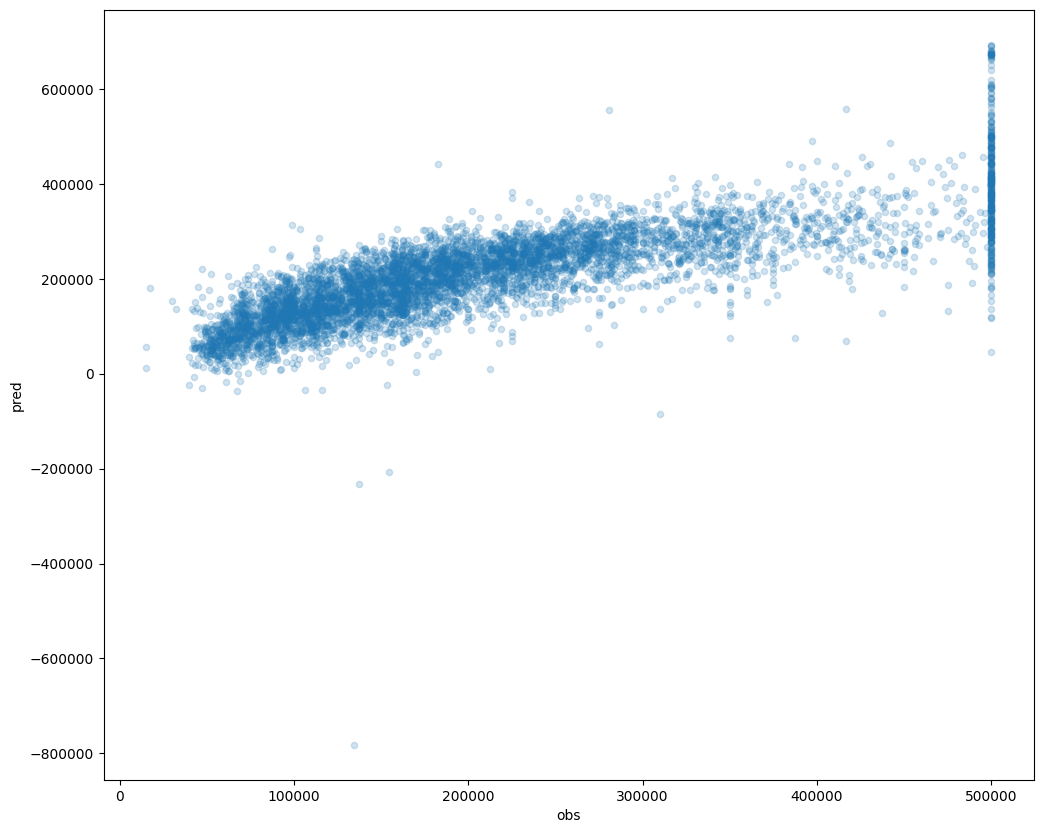

In [25]:
import matplotlib.pyplot as plt
비교.columns = ["obs","pred"] # 컬럼 이름이 없어서 만들어줌
비교.plot(kind='scatter',x='obs',y='pred',alpha=0.2,figsize=(12,10))
plt.show()
# 해석: 가격이 0 이하가 된다. 말이 안된다. 그리고 오른쪽 세로줄. outlyer. 

통계모델 적용해보기

In [26]:
import statsmodels.api as sm
# with statsmodels
train_X1 = sm.add_constant(train_X) # adding a constant
# 1이라는 값을 추가해서 beta_0도 같이 분석하도록

In [27]:
model = sm.OLS(train_y, train_X1).fit() # OLS 회귀 분석 방법 ordinary list square? ** y먼저 

In [28]:
test_X1 = sm.add_constant(test_X) # 테스트셋에도 1 추가
pred = model.predict(test_X1) 

In [29]:
비교 = pd.concat([pd.Series(list(test_y)),pd.Series(list(pred))],axis=1)
비교.head()

,0,1
0,167500.0,175628.126944
1,77400.0,113786.849348
2,165000.0,256720.805169
3,140700.0,188596.079604
4,81300.0,193363.107479


In [30]:
print_model = model.summary()
print(print_model)
# 모든 변수가 유의하다고 나옴
# 하지만 결합력?은 떨어짐

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2235.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:31:36   Log-Likelihood:            -1.8133e+05
No. Observations:               14448   AIC:                         3.627e+05
Df Residuals:                   14435   BIC:                         3.628e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.886e+06   8.79

### 데이터 시각화

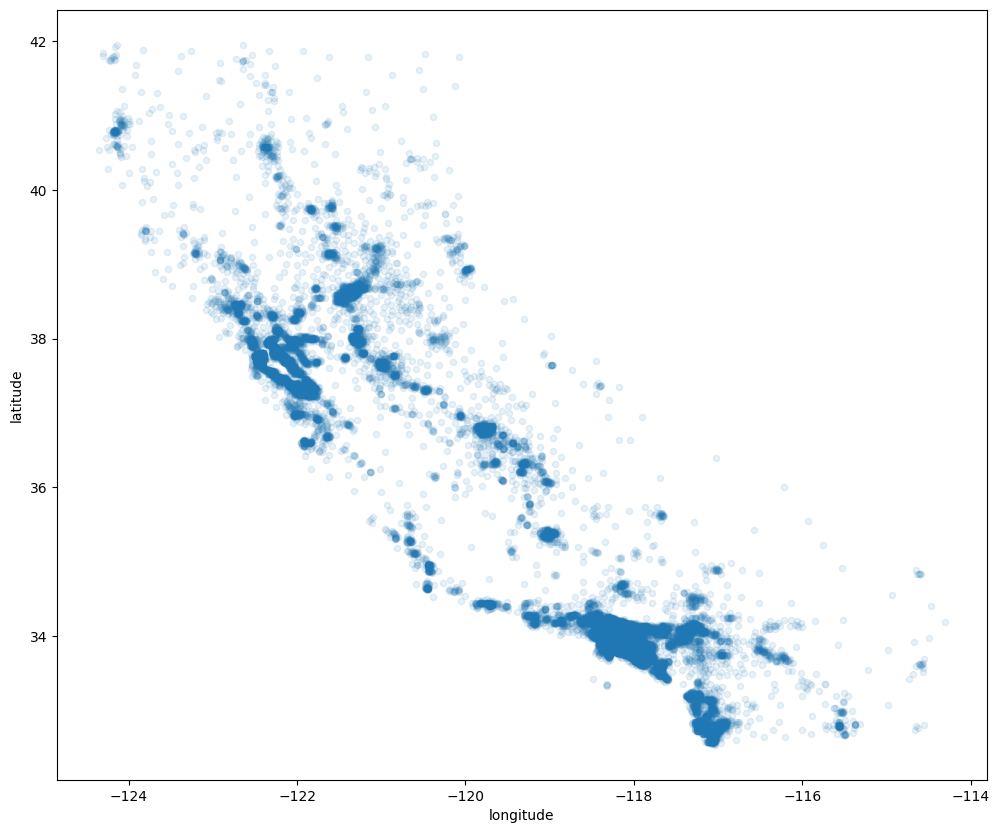

In [31]:
import matplotlib.pyplot as plt

주택.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,10))
plt.show()

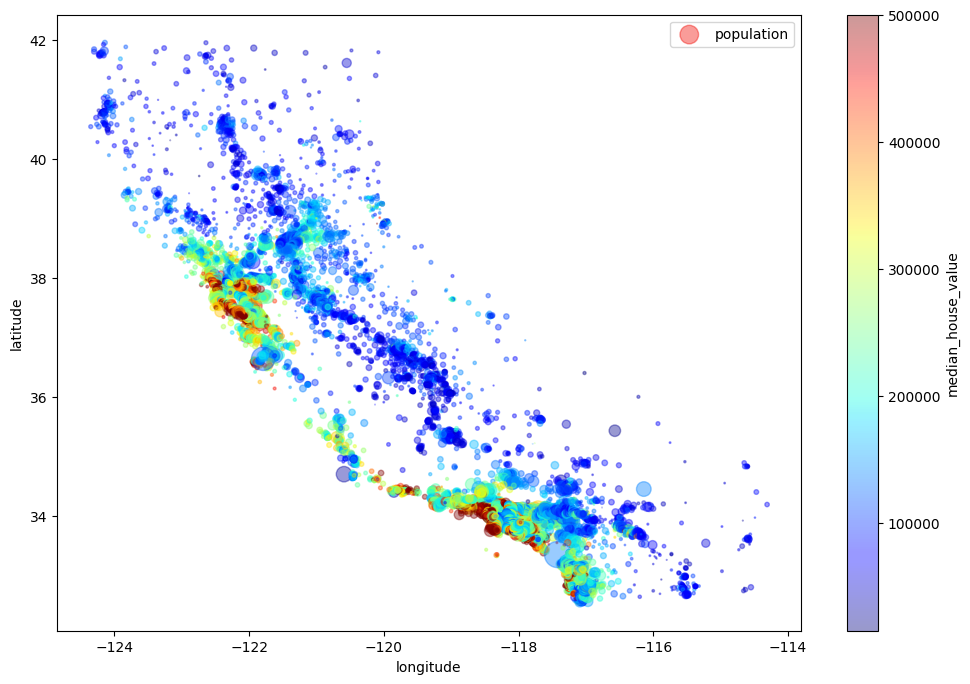

In [44]:
import matplotlib.pyplot as plt
주택.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=주택['population']/100,label='population',
             figsize=(12,8),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()
plt.show()

In [33]:
# !pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 102.3/102.3 kB ? eta 0:00:00


In [35]:
import folium
위도평균 = 주택["latitude"].mean()
경도평균 = 주택["longitude"].mean() 
print("평균: 위도",위도평균,"경도",경도평균)

평균: 위도 35.63186143410853 경도 -119.56970445736432


In [37]:
위도 = list(주택["latitude"])
경도 = list(주택["longitude"])
가격 = list(5*주택["median_house_value"]/주택["median_house_value"].max())

In [45]:
지도표시 = folium.Map(location=[위도평균,경도평균],zoom_start=9)
지도표시

In [39]:
for i in range(0,100):
    folium.CircleMarker([위도[i], 경도[i]]).add_to(지도표시)
지도표시

In [40]:
지도표시 = folium.Map(location=[위도평균,경도평균],zoom_start=9)
for i in range(0,1000):
    folium.CircleMarker([위도[i], 경도[i]],radius=가격[i]).add_to(지도표시)
지도표시

In [41]:
지도표시 = folium.Map(location=[위도평균,경도평균],zoom_start=9)
for i in range(0,1000):
    folium.CircleMarker([위도[i], 경도[i]],radius=가격[i],opacity=0.3,fill=True,fill_opacity=0.2).add_to(지도표시)
지도표시

In [42]:

지도표시 = folium.Map(location=[위도평균,경도평균],zoom_start=9)
for i in range(0,1000):
    folium.CircleMarker([위도[i], 경도[i]],radius=가격[i],opacity=0.3,fill=True,fill_opacity=0.2).add_to(지도표시)
지도표시

In [43]:

주택위치 = list(주택['ocean_proximity'])
위치 = list(주택['ocean_proximity'].values)

In [44]:
지도표시 = folium.Map(location=[위도평균,경도평균],zoom_start=9)
for i in range(0,1000):
    if 주택위치[i]==위치[0]: 색깔 = "red"
    elif 주택위치[i]==위치[1]: 색깔 = "orange"
    elif 주택위치[i]==위치[2]: 색깔 = "yellow"
    elif 주택위치[i]==위치[2]: 색깔 = "green"
    else: 색깔 = "blue"    
    folium.CircleMarker([위도[i], 경도[i]],radius=가격[i],color=색깔, opacity=0.3,fill=True,fill_opacity=0.2).add_to(지도표시)
지도표시